# Missing value

In [121]:
import pandas as pd
import numpy as np

In [122]:
df=pd.read_csv("sample_real_estate_data.csv")

In [123]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,0,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


In [124]:
#standard missing value 
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [125]:
# non stardard missing value 
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [126]:
missing_value= ['n/a','na','--']
df=pd.read_csv("sample_real_estate_data.csv",na_values=missing_value)

In [127]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,0,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [128]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool

In [129]:
#unexpected missing value 
count=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[count,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    count+=1
   

In [130]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [131]:
# summarize missing value 
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [132]:
#if any missing value 
df.isnull().values.any()

True

In [133]:
from sklearn.impute import SimpleImputer 


X = df.iloc[:,:-1].values
Y = df.iloc[:,6]
X

array([[100001000.0, 104.0, 'PUTNAM', 'Y', 3.0, '1'],
       [100002000.0, 197.0, 'LEXINGTON', 'N', 3.0, '0'],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1'],
       [100004000.0, 201.0, 'BERKELEY', nan, 1.0, nan],
       [nan, 203.0, 'BERKELEY', 'Y', 3.0, '2'],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1'],
       [100007000.0, nan, 'WASHINGTON', nan, 2.0, 'HURLEY'],
       [100008000.0, 213.0, 'TREMONT', 'Y', 1.0, '1'],
       [100009000.0, 215.0, 'TREMONT', 'Y', nan, '2']], dtype=object)

In [134]:
Y

0    1000.0
1     100.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64

In [135]:
imput =  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imput = imput.fit(X[:,1:2])
X[:,1:2] = imput.transform(X[:,1:2])
X[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [136]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,0,100.0
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


In [137]:
mean_no = df['ST_NUM'].mean()
df['ST_NUM'].fillna(mean_no, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,0,100.0
2,100003000.0,191.428571,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,2.5,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.000000,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.000000,TREMONT,Y,2.5,2,1800.0


In [138]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,0,100.0
2,100003000.0,191.428571,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,2.5,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.000000,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.000000,TREMONT,Y,2.5,2,1800.0


# One hot encoding 

In [139]:
df=pd.read_csv('MallCustomers.csv')

In [140]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [141]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

In [142]:
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X

array([[1, 1, 19, 15],
       [2, 1, 21, 15],
       [3, 0, 20, 16],
       [4, 0, 23, 16],
       [5, 0, 31, 17],
       [6, 0, 22, 17],
       [7, 0, 35, 18],
       [8, 0, 23, 18],
       [9, 1, 64, 19],
       [10, 0, 30, 19],
       [11, 1, 67, 19],
       [12, 0, 35, 19],
       [13, 0, 58, 20],
       [14, 0, 24, 20],
       [15, 1, 37, 20],
       [16, 1, 22, 20],
       [17, 0, 35, 21],
       [18, 1, 20, 21],
       [19, 1, 52, 23],
       [20, 0, 35, 23],
       [21, 1, 35, 24],
       [22, 1, 25, 24],
       [23, 0, 46, 25],
       [24, 1, 31, 25],
       [25, 0, 54, 28],
       [26, 1, 29, 28],
       [27, 0, 45, 28],
       [28, 1, 35, 28],
       [29, 0, 40, 29],
       [30, 0, 23, 29],
       [31, 1, 60, 30],
       [32, 0, 21, 30],
       [33, 1, 53, 33],
       [34, 1, 18, 33],
       [35, 0, 49, 33],
       [36, 0, 21, 33],
       [37, 0, 42, 34],
       [38, 0, 30, 34],
       [39, 0, 36, 37],
       [40, 0, 20, 37],
       [41, 0, 65, 38],
       [42, 1, 24, 38],
 

In [143]:
from sklearn.preprocessing import OneHotEncoder
onehotencod = OneHotEncoder()

In [144]:
X = onehotencod.fit_transform(X).toarray()
X


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# TestSet&Feature_scalling

In [145]:
df=pd.read_csv('diabetes.csv')

In [146]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               2 non-null      object 
 11  Unnamed: 11               0 non-null      float64
 12  Unnamed: 12               2 non-null      object 
dtypes: float64(4), int64(7), object(2)
memory usage: 78.1+ KB


In [148]:
df['Pregnancies'] = pd.to_numeric(df['Pregnancies'],errors='coerce')

In [149]:
df['Pregnancies']=df['Pregnancies'].astype('float')
df=df.drop(df['Pregnancies'])

In [150]:

X = df.iloc[:,:-1].values 
y = df.iloc[:,8].values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
16,0.0,118,84,47,230,45.8,0.551,31,1,NaN,NaN,NaN,NaN
18,1.0,103,30,38,83,43.3,0.183,33,0,NaN,NaN,NaN,NaN
19,1.0,115,70,30,96,34.6,0.529,32,1,NaN,NaN,NaN,NaN
20,3.0,126,88,41,235,39.3,0.704,27,0,NaN,NaN,NaN,NaN
21,8.0,99,84,0,0,35.4,0.388,50,0,NaN,NaN,NaN,NaN


In [151]:
df['Pregnancies'].isnull().sum()

0

In [152]:
df['Pregnancies']=df['Pregnancies'].astype('int32')

In [153]:
X

array([[0.0, 118, 84, ..., nan, nan, nan],
       [1.0, 103, 30, ..., nan, nan, nan],
       [1.0, 115, 70, ..., nan, nan, nan],
       ...,
       [5.0, 121, 72, ..., nan, nan, nan],
       [1.0, 126, 60, ..., nan, nan, nan],
       [1.0, 93, 70, ..., nan, nan, nan]], dtype=object)

In [154]:
Y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [156]:
X_train[:,0]

array([0.0, 1.0, 2.0, 3.0, 2.0, 4.0, 1.0, 1.0, 17.0, 4.0, 3.0, 0.0, 1.0,
       1.0, 5.0, 3.0, 2.0, 5.0, 5.0, 2.0, 2.0, 0.0, 4.0, 6.0, 6.0, 8.0,
       9.0, 3.0, 1.0, 12.0, 2.0, 6.0, 1.0, 0.0, 1.0, 0.0, 4.0, 1.0, 8.0,
       9.0, 8.0, 4.0, 5.0, 3.0, 0.0, 5.0, 0.0, 3.0, 11.0, 6.0, 1.0, 0.0,
       2.0, 1.0, 3.0, 0.0, 4.0, 4.0, 0.0, 3.0, 5.0, 1.0, 1.0, 5.0, 7.0,
       1.0, 8.0, 0.0, 5.0, 1.0, 8.0, 7.0, 8.0, 1.0, 4.0, 1.0, 1.0, 1.0,
       0.0, 6.0, 2.0, 2.0, 2.0, 10.0, 0.0, 1.0, 10.0, 6.0, 0.0, 4.0, 0.0,
       1.0, 1.0, 1.0, 1.0, 2.0, 6.0, 8.0, 6.0, 1.0, 2.0, 8.0, 0.0, 13.0,
       9.0, 1.0, 10.0, 4.0, 2.0, 12.0, 2.0, 0.0, 7.0, 7.0, 6.0, 7.0, 2.0,
       7.0, 2.0, 6.0, 2.0, 1.0, 7.0, 3.0, 10.0, 11.0, 2.0, 1.0, 10.0, 2.0,
       5.0, 0.0, 1.0, 4.0, 2.0, 10.0, 0.0, 9.0, 1.0, 1.0, 0.0, 0.0, 0.0,
       8.0, 8.0, 1.0, 5.0, 4.0, 0.0, 5.0, 1.0, 7.0, 4.0, 0.0, 1.0, 11.0,
       2.0, 1.0, 3.0, 1.0, 4.0, 4.0, 7.0, 2.0, 0.0, 2.0, 5.0, 2.0, 7.0,
       9.0, 6.0, 4.0, 3.0, 12.0, 0.0, 2.0, 6.0, 2.0

In [157]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)

C:\Users\t\anaconda3\lib\site-packages\sklearn\utils\extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\t\anaconda3\lib\site-packages\sklearn\utils\extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [158]:
X_train

array([[-1.13093557, -0.18229659,  0.56290586, ...,         nan,
                nan,         nan],
       [-0.83629322,  0.81488134, -0.69968673, ...,         nan,
                nan,         nan],
       [-0.54165086, -1.428769  , -3.64573612, ...,         nan,
                nan,         nan],
       ...,
       [ 2.40477269, -0.99250365,  0.24725772, ...,         nan,
                nan,         nan],
       [ 0.04763385,  1.18882306,  0.45768982, ...,         nan,
                nan,         nan],
       [-0.83629322, -1.1483127 , -0.06839043, ...,         nan,
                nan,         nan]])

# Log Transformation for Outliers


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df.head()

,Positive Skewed
0,1
1,1
2,10
3,10
4,15


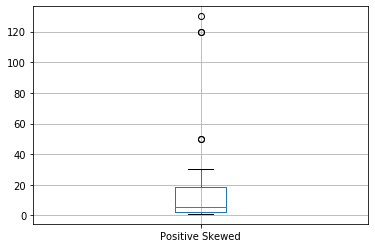

In [160]:
#Boxplot showing three outliers
df.boxplot(column='Positive Skewed')
plt.show()

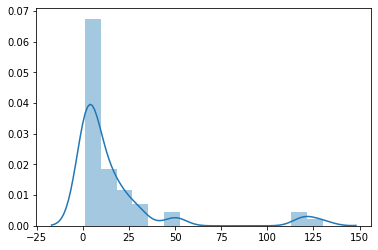

In [161]:

#Right Skewed data
sns.distplot(df)

In [162]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
inp_array = df 
print ("Input array : ", inp_array)

Input array :      Positive Skewed
0                 1
1                 1
2                10
3                10
4                15
5                15
6                20
7                20
8                30
9                50
10              120
11              130
12              120
13               50
14               30
15               30
16               25
17               20
18               20
19               15
20               15
21               13
22               11
23                9
24                7
25                6
26                6
27                5
28                5
29                5
30                4
31                4
32                4
33                4
34                3
35                3
36                3
37                3
38                2
39                2
40                2
41                2
42                2
43                1
44                1
45                1
46                1
47                1
48   

In [163]:

#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(inp_array) 
print ("Output array : ", out_array)

Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          1.176091
5          1.176091
6          1.301030
7          1.301030
8          1.477121
9          1.698970
10         2.079181
11         2.113943
12         2.079181
13         1.698970
14         1.477121
15         1.477121
16         1.397940
17         1.301030
18         1.301030
19         1.176091
20         1.176091
21         1.113943
22         1.041393
23         0.954243
24         0.845098
25         0.778151
26         0.778151
27         0.698970
28         0.698970
29         0.698970
30         0.602060
31         0.602060
32         0.602060
33         0.602060
34         0.477121
35         0.477121
36         0.477121
37         0.477121
38         0.301030
39         0.301030
40         0.301030
41         0.301030
42         0.301030
43         0.000000
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48  

In [164]:

#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(inp_array) 
print ("Output array : ", out_array)

Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          1.176091
5          1.176091
6          1.301030
7          1.301030
8          1.477121
9          1.698970
10         2.079181
11         2.113943
12         2.079181
13         1.698970
14         1.477121
15         1.477121
16         1.397940
17         1.301030
18         1.301030
19         1.176091
20         1.176091
21         1.113943
22         1.041393
23         0.954243
24         0.845098
25         0.778151
26         0.778151
27         0.698970
28         0.698970
29         0.698970
30         0.602060
31         0.602060
32         0.602060
33         0.602060
34         0.477121
35         0.477121
36         0.477121
37         0.477121
38         0.301030
39         0.301030
40         0.301030
41         0.301030
42         0.301030
43         0.000000
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48  

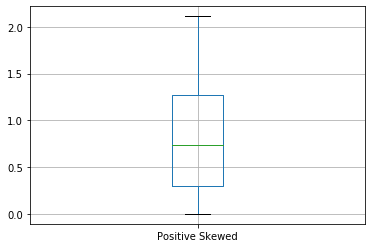

In [165]:
#Boxplot showing No outliers with all of them treated by doing log10 transformation.
out_array.boxplot(column='Positive Skewed')
plt.show()

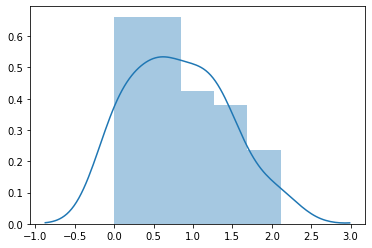

In [166]:
#Right Skewed data transformed to Fairly or close to Normal Distribution using Log10 transformations
sns.distplot(out_array)

In [167]:

#If wants to revert back log10 values to original value for interpretation purpose then just raise 10 to the power 
#log10 values as shown below.
original_val = (10**out_array) 
print ("Original Values : ", original_val)

Original Values :      Positive Skewed
0               1.0
1               1.0
2              10.0
3              10.0
4              15.0
5              15.0
6              20.0
7              20.0
8              30.0
9              50.0
10            120.0
11            130.0
12            120.0
13             50.0
14             30.0
15             30.0
16             25.0
17             20.0
18             20.0
19             15.0
20             15.0
21             13.0
22             11.0
23              9.0
24              7.0
25              6.0
26              6.0
27              5.0
28              5.0
29              5.0
30              4.0
31              4.0
32              4.0
33              4.0
34              3.0
35              3.0
36              3.0
37              3.0
38              2.0
39              2.0
40              2.0
41              2.0
42              2.0
43              1.0
44              1.0
45              1.0
46              1.0
47              1.0
4

In [168]:
import pandas as pd 
# Create a list of data. Here, we have included zeros as well in the data
data = [0,0,1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1,0,0] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df2

,Positive Skewed
0,0
1,0
2,1
3,1
4,10
5,10
6,15
7,15
8,20
9,20


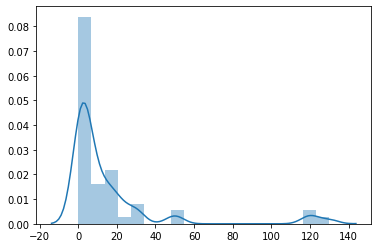

In [169]:
#Right Skewed data 
sns.distplot(df2)

In [170]:

#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 0 to 130
inp_array2 = df2 
print ("Input array : ", inp_array2)


Input array :      Positive Skewed
0                 0
1                 0
2                 1
3                 1
4                10
5                10
6                15
7                15
8                20
9                20
10               30
11               50
12              120
13              130
14              120
15               50
16               30
17               30
18               25
19               20
20               20
21               15
22               15
23               13
24               11
25                9
26                7
27                6
28                6
29                5
30                5
31                5
32                4
33                4
34                4
35                4
36                3
37                3
38                3
39                3
40                2
41                2
42                2
43                2
44                2
45                1
46                1
47                1
48   

In [171]:
#Applying Square Root transformation with output values ranging from 0 to 11+
out_array2 = np.sqrt(inp_array2) 
print ("Output array : ", out_array2)

Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          3.162278
5          3.162278
6          3.872983
7          3.872983
8          4.472136
9          4.472136
10         5.477226
11         7.071068
12        10.954451
13        11.401754
14        10.954451
15         7.071068
16         5.477226
17         5.477226
18         5.000000
19         4.472136
20         4.472136
21         3.872983
22         3.872983
23         3.605551
24         3.316625
25         3.000000
26         2.645751
27         2.449490
28         2.449490
29         2.236068
30         2.236068
31         2.236068
32         2.000000
33         2.000000
34         2.000000
35         2.000000
36         1.732051
37         1.732051
38         1.732051
39         1.732051
40         1.414214
41         1.414214
42         1.414214
43         1.414214
44         1.414214
45         1.000000
46         1.000000
47         1.000000
48  

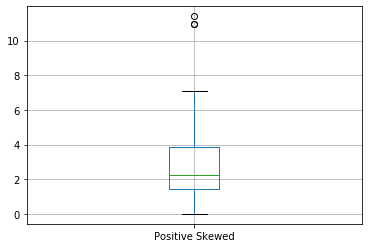

In [172]:
#Boxplot showing only Two outliers now, with one of those treated by doing Square Root transformation.
out_array2.boxplot(column='Positive Skewed')
plt.show()


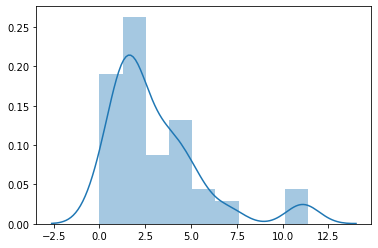

In [173]:

#Right Skewed data transformed to Fairly or close to Normal Distribution using Square Root transformations, though not perfect
#Normal Distribution since this type of transformation has moderate effect on distribution shape
sns.distplot(out_array2)

# Operations


In [174]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [175]:
capital=lambda x:x.upper()

df['Species'].apply(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [176]:
#map  function 
df['Species'].map(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [177]:
#Dropping unwanted columns
df = df.drop(['Id','Species'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [178]:
#ApplyMap function usage on Built-In function (sqrt, square)
df.applymap(np.sqrt)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,2.258318,1.870829,1.183216,0.447214
1,2.213594,1.732051,1.183216,0.447214
2,2.167948,1.788854,1.140175,0.447214
3,2.144761,1.760682,1.224745,0.447214
4,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575
146,2.509980,1.581139,2.236068,1.378405
147,2.549510,1.732051,2.280351,1.414214
148,2.489980,1.843909,2.323790,1.516575


In [179]:
df.applymap(np.square)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [180]:
def multiply50(x):
    if type(x) is str:
        return x
    else:
        return 50*x
    
    

In [181]:

df.applymap(multiply50)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,255.0,175.0,70.0,10.0
1,245.0,150.0,70.0,10.0
2,235.0,160.0,65.0,10.0
3,230.0,155.0,75.0,10.0
4,250.0,180.0,70.0,10.0
...,...,...,...,...
145,335.0,150.0,260.0,115.0
146,315.0,125.0,250.0,95.0
147,325.0,150.0,260.0,100.0
148,310.0,170.0,270.0,115.0
